<a target="_blank" href="https://colab.research.google.com/github/TuragaLab/jhu-janelia-2023-ml-demo/blob/main/kandinsky_diffusion.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate safetensors invisible-watermark>=0.2.0

In [1]:
import matplotlib.pyplot as plt
from diffusers import AutoPipelineForText2Image
import torch
import numpy as np

In [2]:
pipe = AutoPipelineForText2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16, use_safetensors=True
)
pipe.enable_model_cpu_offload()

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [3]:
def generate_and_show_images(prompt: str, negative_prompt: str = "low quality, bad quality", num_variations: int = 1, dpi: int = 150):
    images = pipe(
        prompt=[prompt] * num_variations,
        negative_prompt=[negative_prompt] * num_variations,
        guidance_scale=5,
        prior_guidance_scale=1,
        num_inference_steps=50,
        height=768,
        width=768,
    ).images
    fig, axes = plt.subplots(nrows=1, ncols=num_variations, dpi=dpi)
    axes = np.atleast_1d(axes).ravel()
    for image, ax in zip(images, axes):
      ax.imshow(image)
      ax.axis("off")
    plt.tight_layout()
    plt.show()
    del fig
    del axes

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

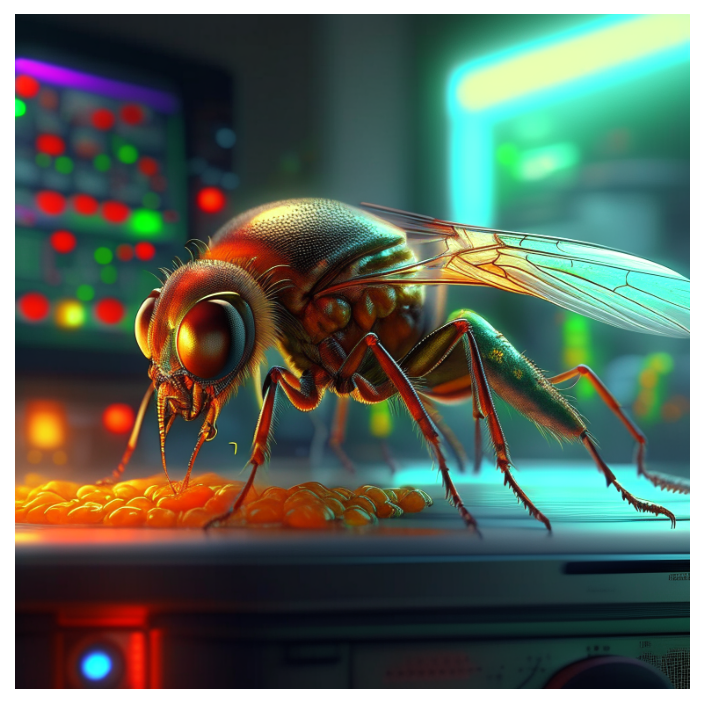

In [12]:
generate_and_show_images("a fruit fly sitting at a computer programming a physics simulation of a human, painting, concept art")

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

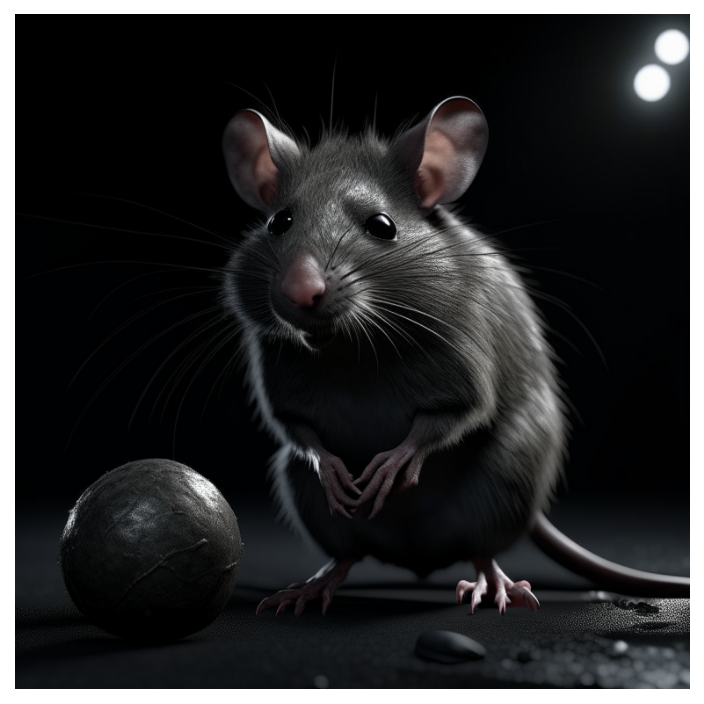

In [6]:
generate_and_show_images("photograph of a rat and tennis ball, photorealistic, detailed, 8k")